In [2]:
import pandas as pd

In [3]:
premise_file = "../Data/OnlineNewsPopularity.csv"
premise_df = pd.read_csv(premise_file)
premise_df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [4]:
premise_df.drop_duplicates("url", inplace=True)
article_df=premise_df.drop(columns=[' timedelta'])
article_df.head()

,url,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [5]:
transformed_article_df = article_df.copy()
transformed_article_df.rename(columns={" n_tokens_title": "Title_Word_Count",
                                        " n_tokens_content": "Content_Word_Count",
                                        " n_unique_tokens": "Unique_Word_Rate",
                                        " n_non_stop_words": "Non_Stop_Word_Rate",
                                       " n_non_stop_unique_tokens": "Unique_Non_Stop_Word_Rate",
                                       " num_hrefs": "Number_of_Links",
                                       " num_self_hrefs": "Number_of_Mashable_Links",
                                       " num_imgs": "Images",
                                       " num_videos": "Videos",
                                       " average_token_length": "Average_Word_Length",
                                       " num_keywords": "Number_of_Keywords",
                                       " data_channel_is_lifestyle": "Lifestyle",
                                       " data_channel_is_entertainment": "Entertainment",
                                       " data_channel_is_bus": "Business",
                                       " data_channel_is_socmed": "Social_Media",
                                       " data_channel_is_tech": "Tech",
                                       " data_channel_is_world": "World",
                                       " kw_min_min": "Worst_Keyword_Min_Shares",
                                       " kw_max_min": "Worst_Keyword_Max_Shares",
                                       " kw_avg_min": "Worst_Keyword_Avg_Shares",
                                       " kw_min_max": "Best_Keyword_Min_Shares",
                                       " kw_max_max": "Best_Keyword_Max_Shares",
                                       " kw_avg_max": "Best_Keyword_Avg_Shares",
                                       " kw_min_avg": "Avg_Keyword_Min_Shares",
                                       " kw_max_avg": "Avg_Keyword_Max_Shares",
                                       " kw_avg_avg": "Avg_Keyword_Avg_Shares",
                                       " self_reference_min_shares": "Min_Ref_Mashable_Article_Shares",
                                       " self_reference_max_shares": "Max_Ref_Mashable_Article_Shares",
                                       " self_reference_ave_sharess": "Avg_Ref_Mashable_Article_Shares",
                                       " weekday_is_monday": "Monday",
                                       " weekday_is_tuesday": "Tuesday",
                                       " weekday_is_wednesday": "Wednesday",
                                       " weekday_is_thursday": "Thursday",
                                       " weekday_is_friday": "Friday",
                                       " weekday_is_saturday": "Saturday",
                                       " weekday_is_sunday": "Sunday",
                                       " is_weekend": "Weekend",
                                       " LDA_00": "Closeness_to_LDA_0",
                                       " LDA_01": "Closeness_to_LDA_1",
                                       " LDA_02": "Closeness_to_LDA_2",
                                       " LDA_03": "Closeness_to_LDA_3",
                                       " LDA_04": "Closeness_to_LDA_4",
                                       " global_subjectivity": "Text_Subjectivity",
                                       " global_sentiment_polarity": "Text_Sentiment_Polarity",
                                       " global_rate_positive_words": "Global_Positive_Word_Rate",
                                       " global_rate_negative_words": "Global_Negative_Word_Rate",
                                       " rate_positive_words": "Positive_Word_Rate",
                                       " rate_negative_words": "Negative_Word_Rate",
                                       " avg_positive_polarity": "Average_Positive_Polarity",
                                       " min_positive_polarity": "Minimum_Positive_Polarity",
                                       " max_positive_polarity": "Maximum_Positive_Polarity",
                                       " avg_negative_polarity": "Average_Negative_Polarity",
                                       " min_negative_polarity": "Minimum_Negative_Polarity",
                                       " max_negative_polarity": "Maximum_Negative_Polarity",
                                       " title_subjectivity": "Title_Subjectivity",
                                       " title_sentiment_polarity": "Title_Polarity",
                                       " abs_title_subjectivity": "Absolute_Subjectivity_Level",
                                       " abs_title_sentiment_polarity": "Absolute_Polarity_Level",
                                       " shares": "Shares"
                                       }, inplace = True)
transformed_article_df.head()

,url,Title_Word_Count,Content_Word_Count,Unique_Word_Rate,Non_Stop_Word_Rate,Unique_Non_Stop_Word_Rate,Number_of_Links,Number_of_Mashable_Links,Images,Videos,...,Minimum_Positive_Polarity,Maximum_Positive_Polarity,Average_Negative_Polarity,Minimum_Negative_Polarity,Maximum_Negative_Polarity,Title_Subjectivity,Title_Polarity,Absolute_Subjectivity_Level,Absolute_Polarity_Level,Shares
0,http://mashable.com/2013/01/07/amazon-instant-...,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [6]:
transformed_article_df.dropna()
transformed_article_df.shape

(39644, 60)

In [7]:
#Find 4 Bin Values 
bins=[0,0,0,0]
bins[0]=transformed_article_df["Shares"].quantile(q=0.2)
bins[1]=transformed_article_df["Shares"].quantile(q=0.4)
bins[2]=transformed_article_df["Shares"].quantile(q=0.6)
bins[3]=transformed_article_df["Shares"].quantile(q=0.8)
bins

[870.6000000000004, 1200.0, 1800.0, 3400.0]

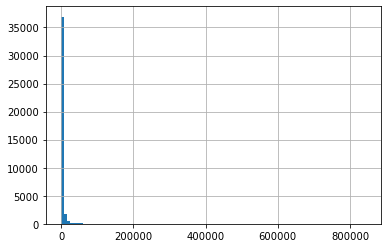

In [8]:
transformed_article_df["Shares"].hist(bins=100)

In [9]:
transformed_article_df["Shares"].quantile(q=0.995)

50678.49999999962

In [10]:
transformed_article_df.to_csv('../Data/cleaneddata.csv')